[View in Colaboratory](https://colab.research.google.com/github/Kapil-Pathak/TensorFlowBasic/blob/master/Overfitting_and_Underfitting.ipynb)

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.10.1


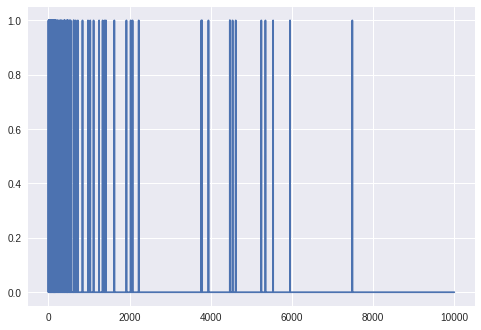

In [13]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)
plt.plot(train_data[0])


In [14]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [15]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.4662 - acc: 0.8094 - binary_crossentropy: 0.4662 - val_loss: 0.3247 - val_acc: 0.8780 - val_binary_crossentropy: 0.3247
Epoch 2/20
 - 4s - loss: 0.2404 - acc: 0.9136 - binary_crossentropy: 0.2404 - val_loss: 0.2844 - val_acc: 0.8870 - val_binary_crossentropy: 0.2844
Epoch 3/20
 - 4s - loss: 0.1762 - acc: 0.9382 - binary_crossentropy: 0.1762 - val_loss: 0.2920 - val_acc: 0.8840 - val_binary_crossentropy: 0.2920
Epoch 4/20
 - 4s - loss: 0.1389 - acc: 0.9536 - binary_crossentropy: 0.1389 - val_loss: 0.3191 - val_acc: 0.8784 - val_binary_crossentropy: 0.3191
Epoch 5/20
 - 4s - loss: 0.1134 - acc: 0.9626 - binary_crossentropy: 0.1134 - val_loss: 0.3494 - val_acc: 0.8726 - val_binary_crossentropy: 0.3494
Epoch 6/20
 - 4s - loss: 0.0909 - acc: 0.9723 - binary_crossentropy: 0.0909 - val_loss: 0.3834 - val_acc: 0.8691 - val_binary_crossentropy: 0.3834
Epoch 7/20
 - 4s - loss: 0.0724 - acc: 0.9808 - binary_crossentropy:

In [17]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6490 - acc: 0.6010 - binary_crossentropy: 0.6490 - val_loss: 0.5665 - val_acc: 0.6794 - val_binary_crossentropy: 0.5665
Epoch 2/20
 - 4s - loss: 0.5072 - acc: 0.7902 - binary_crossentropy: 0.5072 - val_loss: 0.4946 - val_acc: 0.8447 - val_binary_crossentropy: 0.4946
Epoch 3/20
 - 4s - loss: 0.4491 - acc: 0.8784 - binary_cro

In [18]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 20s - loss: 0.3464 - acc: 0.8500 - binary_crossentropy: 0.3464 - val_loss: 0.2957 - val_acc: 0.8803 - val_binary_crossentropy: 0.2957
Epoch 2/20
 - 19s - loss: 0.1418 - acc: 0.9492 - binary_crossentropy: 0.1418 - val_loss: 0.3522 - val_acc: 0.8669 - val_binary_crossentropy: 0.3522
Epoch 3/20
 - 19s - loss: 0.0476 - acc: 0.9864 - b

binary_crossentropy
binary_crossentropy
binary_crossentropy


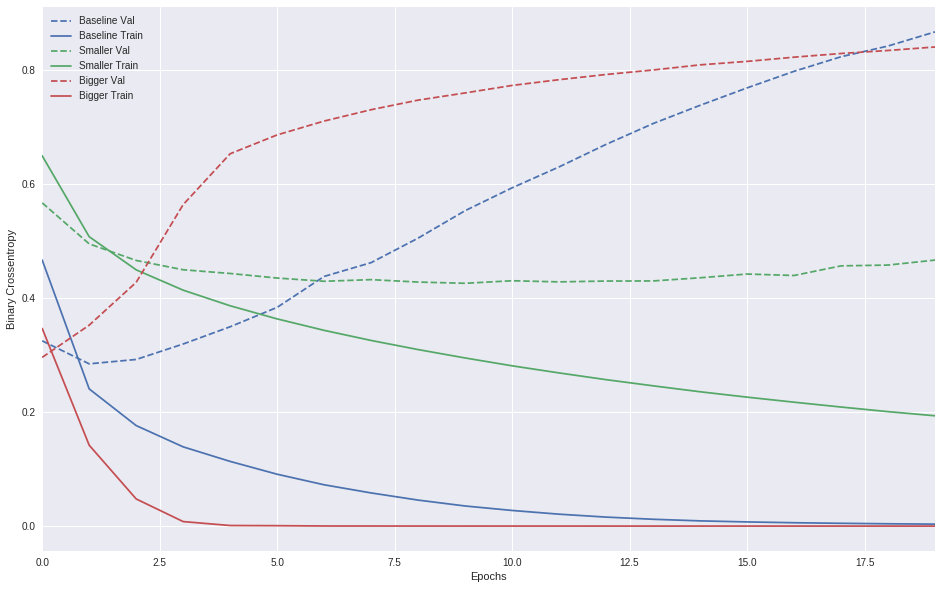

In [23]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')
    print(key)
  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])


In [24]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5423 - acc: 0.8102 - binary_crossentropy: 0.5033 - val_loss: 0.3965 - val_acc: 0.8787 - val_binary_crossentropy: 0.3566
Epoch 2/20
 - 4s - loss: 0.3185 - acc: 0.9074 - binary_crossentropy: 0.2748 - val_loss: 0.3363 - val_acc: 0.8887 - val_binary_crossentropy: 0.2895
Epoch 3/20
 - 4s - loss: 0.2621 - acc: 0.9244 - binary_crossentropy: 0.2130 - val_loss: 0.3323 - val_acc: 0.8875 - val_binary_crossentropy: 0.2813
Epoch 4/20
 - 4s - loss: 0.2344 - acc: 0.9377 - binary_crossentropy: 0.1820 - val_loss: 0.3403 - val_acc: 0.8845 - val_binary_crossentropy: 0.2869
Epoch 5/20
 - 4s - loss: 0.2191 - acc: 0.9441 - binary_crossentropy: 0.1642 - val_loss: 0.3540 - val_acc: 0.8817 - val_binary_crossentropy: 0.2983
Epoch 6/20
 - 4s - loss: 0.2057 - acc: 0.9502 - binary_crossentropy: 0.1493 - val_loss: 0.3663 - val_acc: 0.8785 - val_binary_crossentropy: 0.3095
Epoch 7/20
 - 4s - loss: 0.1984 - acc: 0.9531 - binary_crossentropy:

binary_crossentropy
binary_crossentropy


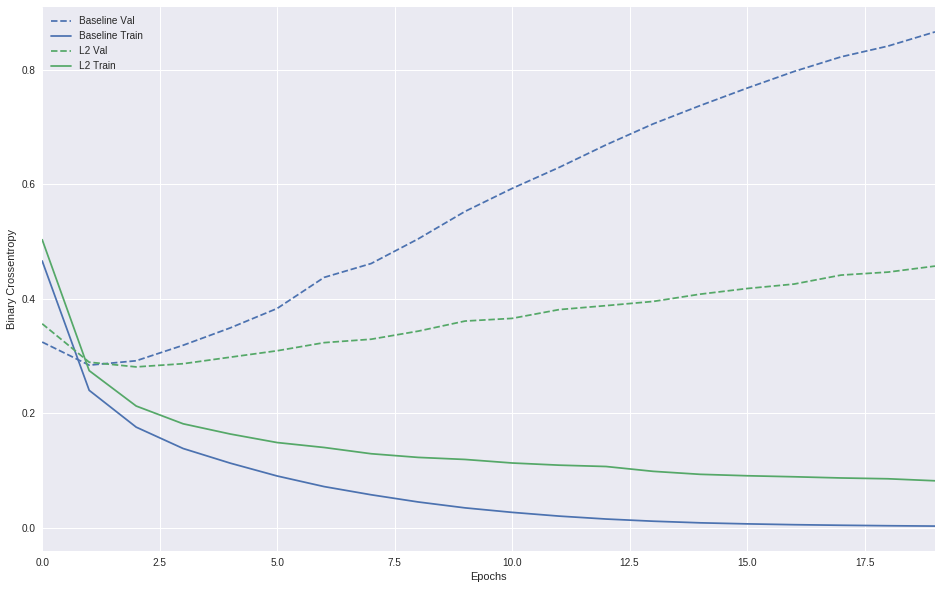

In [25]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [26]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6422 - acc: 0.6406 - binary_crossentropy: 0.6422 - val_loss: 0.5595 - val_acc: 0.7730 - val_binary_crossentropy: 0.5595
Epoch 2/20
 - 4s - loss: 0.5243 - acc: 0.8271 - binary_crossentropy: 0.5243 - val_loss: 0.4656 - val_acc: 0.8519 - val_binary_crossentropy: 0.4656
Epoch 3/20
 - 4s - loss: 0.4451 - acc: 0.8828 - binary_crossentropy: 0.4451 - val_loss: 0.4162 - val_acc: 0.8764 - val_binary_crossentropy: 0.4162
Epoch 4/20
 - 4s - loss: 0.3830 - acc: 0.9055 - binary_crossentropy: 0.3830 - val_loss: 0.3833 - val_acc: 0.8836 - val_binary_crossentropy: 0.3833
Epoch 5/20
 - 4s - loss: 0.3335 - acc: 0.9201 - binary_crossentropy: 0.3335 - val_loss: 0.3620 - val_acc: 0.8848 - val_binary_crossentropy: 0.3620
Epoch 6/20
 - 4s - loss: 0.2961 - acc: 0.9270 - binary_crossentropy: 0.2961 - val_loss: 0.3580 - val_acc: 0.8827 - val_binary_crossentropy: 0.3580
Epoch 7/20
 - 4s - loss: 0.2624 - acc: 0.9342 - binary_crossentropy:

binary_crossentropy
binary_crossentropy


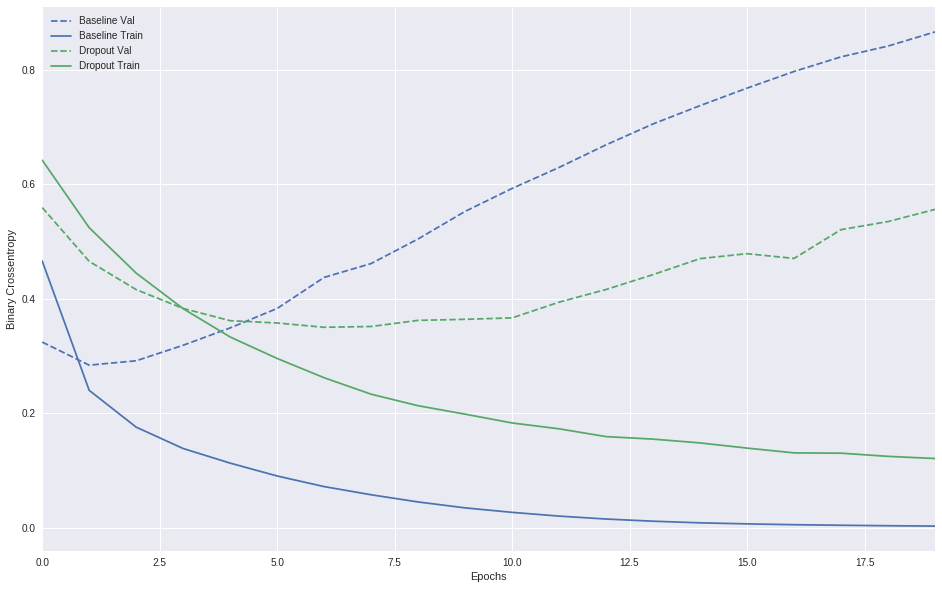

In [27]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])